In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Titanic dataset
url = "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv"
df = pd.read_csv(url)

#Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Problem Space

The sinking of the Titanic remains one of the most tragic and studied maritime disasters in history. Beyond the devastation, the tragedy offers a unique lens through which we can examine human behavior under extreme conditions and also understand whether living conditions were directly tied to survival rate. 

My analysis seeks to determine patterns in survival by addressing the following question: 
1. What role did social class play in determining survival?
2. Did a person's age influence their likelihood of surviving?
3. Were people that were traveling alone more vulnerable as opposed to people traveling in groups or families?
4. Did the port of embarktion affect survival?
5. Were children prioritized during rescue efforts?
6. How did gender affect survival chances? 

By exploring these questions, my project aims to shed light on the social norms, values, and decision-making patterns that influenced and guided survival during one of the most infamous tragedies of the early 20th century. 


Questions to Explore

As mentioned previously, the following questions will guide my analysis:
1. What role did social class play in determining survival?
2. Did a person's age influence their likelihood of surviving?
3. Were people that were traveling alone more vulnerable as opposed to people traveling in groups or families?
4. Did the port of embarktion affect survival?
5. Were children prioritized during rescue efforts?
6. How did gender affect survival chances?


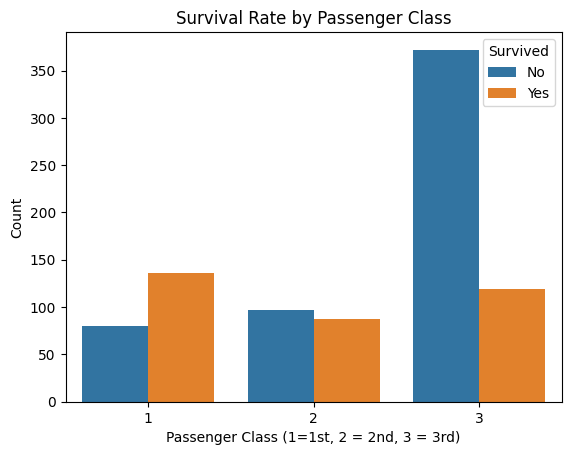

In [2]:
#Analyzing Survival Rates by Social Class
sns.countplot(data=df, x='Pclass', hue = 'Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (1=1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Analysis of the Correlation Between Social Class and Survival

The graph shows that first-class passengers had a much higher survival rate compared to second and third-class passengers. This suggests that social class had a strong influence on survival chances during the Titanic disaster, likely due to easier access to lifeboats and better rescue opportunitiees for wealthier individuals.

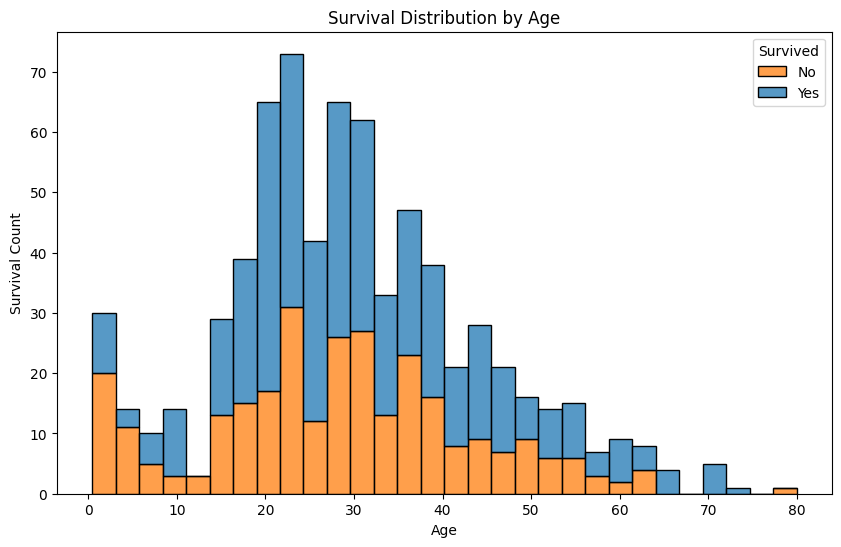

In [3]:
#Analyzing Survival Rates by Age
plt.figure(figsize = (10,6))
sns.histplot(data=df, x= 'Age', hue = 'Survived', multiple = 'stack', bins=30)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Survival Count')
plt.legend(title='Survived', labels = ['No', 'Yes'])
plt.show()


Analysis of the Correlation Between Age and Chances of Survival

The histogram shows that younger passengers, especially children, had slightly higher and more consistent survival rates compared to older passengers. Many adults across all ages did not survive, but there is a noticeable peak of survivors among younger age groups, suggesting that children may have been prioritized during rescue efforts to some extent.

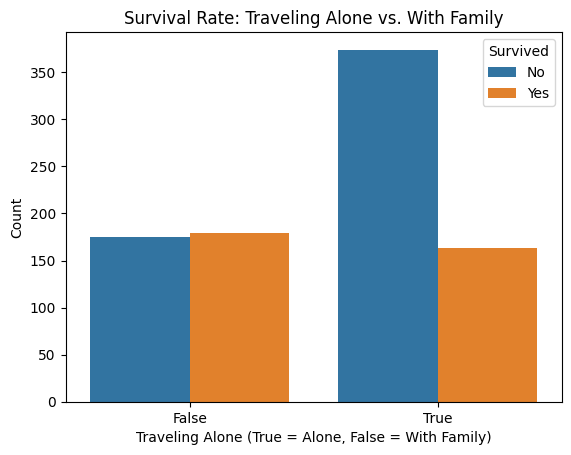

In [4]:
#Analyzing Survival Based on Whether the Passenger Was Alone
#Creating a New Column 'Alone' 
df['Alone'] = (df['SibSp']) + df['Parch'] == 0
sns.countplot(data=df, x= 'Alone', hue = 'Survived')
plt.title('Survival Rate: Traveling Alone vs. With Family')
plt.xlabel('Traveling Alone (True = Alone, False = With Family)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Survival Rate: Traveling Alone vs. With Family

The chart above shows that passengers who traveled with family members had a higher survival rate compared to those who traveled alone. Passengers traveling alone were less likely to survive the Titanic disaster, indicating that being with family or in groups may have improved access to assistance or lifeboats during evacuation.


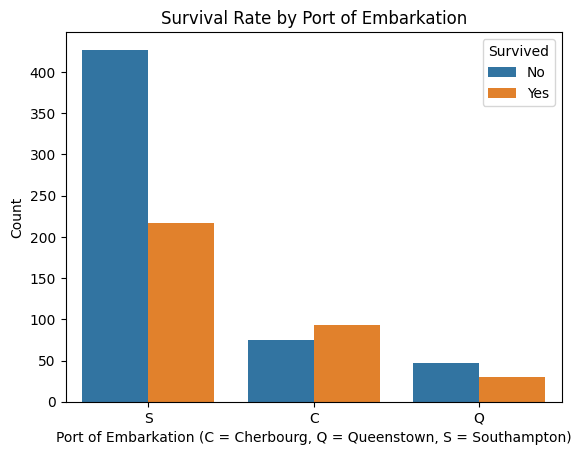

In [5]:
# Analyzing Survival Based on Port of Embarkation
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


Analysis of Port of Embarkation and Survival

The graph shows that passengers who embarked at Cherbourg (C) had a higher survival chance compared to those from Southampton (S) and Queenstown (Q). This suggests that passengers boarding from Cherbourg may have had access to better cabins, more first-class passengers, or greater access to lifeboats, all of which could have contributed to higher survival chances.

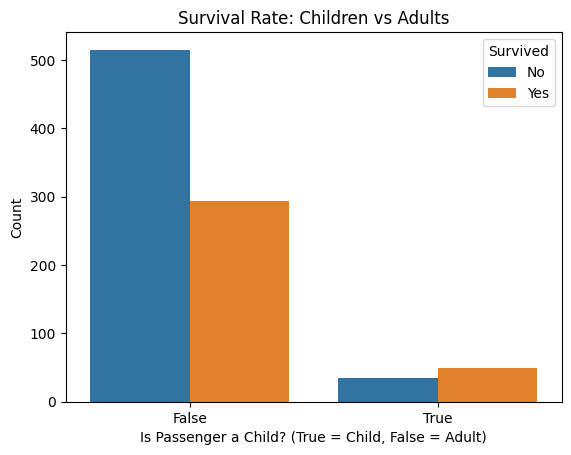

In [6]:
# Defining Children as Passengers Under 16 Years Old
df['Child'] = df['Age'] < 16

sns.countplot(data=df, x='Child', hue='Survived')
plt.title('Survival Rate: Children vs Adults')
plt.xlabel('Is Passenger a Child? (True = Child, False = Adult)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


Analysis of Children and Survival

The chart shows that children, defined as passengers under 16 years old for the case of my data analysis, had a noticeably higher survival rate compared to adults. This suggests that children were prioritized during the evacuation efforts, likely due to social norms emphasizing the protection of the young during emergencies.

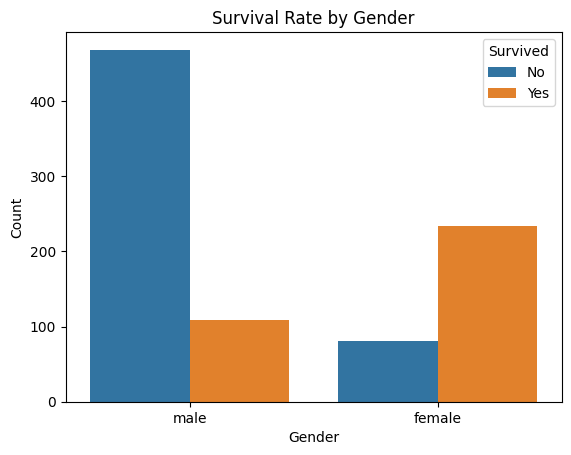

In [7]:
# Analyzing Survival Based on Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


Analysis of the Correlation Between Gender and Survival

The graph shows that female passengers had a significantly higher survival rate than male passengers. This supports the well-known historical reports that emphasize the idea that "women and children first" was a guiding principle during evacuation, which is a standard that is still held today. This could have potentially led to more women surviving in the Titanic disaster as compared to men.

My Final Insights and Conclusion

Through my analysis of the Titanic dataset, several key patterns emerged relating to the six questions I had initially proposed:

Social Class: Passengers in first class had a much higher survival rate compared to their counterparts in second and third class. This likely has to do with the fact that passengers in first class were the ones to evacuate and get access to the lifeboats first.

Age: Younger passengers, especially children under 16, had better survival outcomes. The widely accepted practice of prioritizing women and children for lifeboat evacuation during the Titanic's sinking significantly impacted survival rates, along with the age factor. Many older passengers gave up their spots on the lifeboat to younger passengers.

Traveling Alone: Passengers traveling with family had higher survival rates than those traveling alone. As mentioned above, the "women and children first" policy during the launch of the lifeboats alongside potential family-centered survival strategies could have contributed to this perceived difference. 

Port of Embarkation: Passengers boarding at Cherbourg (C) had a higher survival rate compared to other ports. This is primarily due to their socio-economic status and the policies implemented during evacuation. Cherbourg-bound passengers were more likely to be first or second-class passengers, which meant they had better access to lifeboats and were prioritized during the evacuation.

Children: Children were more likely to survive, suggesting prioritization via "women and children first" during rescue efforts.

Gnder: Female passengers had a significantly higher survival rate than male passengers, supporting historical accounts of "women and children first."

Overall, the survival patterns strongly refleted early 20th-century social norms and rescue priorities, where wealth, gender, age, and group travel influenced one's chances of survival.

Understanding these factors provides a deeper appreciation of human behavior during crises and how societal structures can influence survival outcomes.
